# 项目概览
本项目包括算法、GUI与evaluate三个模块。

GUI界面支持多种算法联合评估，一键生成评估报告。

## Kmeans
进行聚类后以簇的均值代表簇，进行最近邻排序，然后根据相邻最短距离规划簇与簇之间的连接方案

## NNA
最近邻算法

## AOP-simple
质朴的蚁群算法

## AOP-multiprogress
多核并行蚁群算法（已弃用，python多线程效率太低，改用go语言，但是go语言gui界面难以实现）


# 最近邻算法（NNA）
考虑每个距离每个节点最近的节点

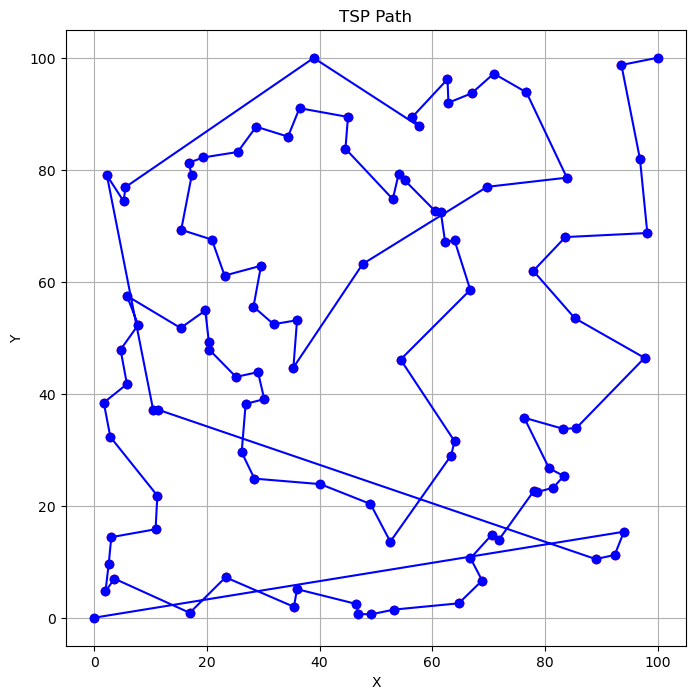

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

# 生成随机节点
def generate_random_nodes(num_nodes, x_max, y_max):
    nodes = np.random.rand(num_nodes, 2)
    nodes[:, 0] *= x_max
    nodes[:, 1] *= y_max
    return nodes

# 计算两点之间的欧几里得距离
def calculate_distance(a, b):
    return euclidean(a, b)

# 使用最近邻算法解决TSP问题
def nearest_neighbor_tsp(nodes):
    path = []
    num_nodes = len(nodes)
    visited = [False] * num_nodes
    
    # 起点
    current = np.array([100.0, 100.0])
    path.append(current)
    
    for _ in range(num_nodes):
        min_distance = float('inf')
        nearest_node_index = -1
        
        for i in range(num_nodes):
            if not visited[i]:
                distance = calculate_distance(current, nodes[i])
                if distance < min_distance:
                    min_distance = distance
                    nearest_node_index = i
        
        visited[nearest_node_index] = True
        current = nodes[nearest_node_index]
        path.append(current)
    
    # 终点
    path.append(np.array([0.0, 0.0]))
    
    return np.array(path)

# 绘制路径
def draw_path(path):
    plt.figure(figsize=(8, 8))
    plt.plot(path[:, 0], path[:, 1], marker='o', linestyle='-', color='b')
    plt.scatter(path[:, 0], path[:, 1], color='r')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Path')
    plt.grid(True)
    plt.show()

def main():
    num_nodes = 100
    x_max = 100.0
    y_max = 100.0
    
    # 生成随机节点
    nodes = generate_random_nodes(num_nodes, x_max, y_max)
    
    # 计算最近邻路径
    path = nearest_neighbor_tsp(nodes)
    
    # 绘制路径
    draw_path(path)

if __name__ == "__main__":
    main()

#### 除了这种方法外，还有很多很棒的方法，比如蚁群算法、遗传算法等等，这些方法都可以用来解决TSP问题。但是当我开始考虑将速度与转弯开销纳入变量中时，问题的解析开始变得棘手。为了保证问题的完整性，我考虑了多种参数大小的范围，当参数数量级过大时，距离矩阵体积过大，运算开销巨大。并且，常规的欧几里得距离不能满足求解需求，因此在进行运算的过程中，需要同时加入多种距离方法，比如曼哈顿距离，这对于增加路径的曲率有巨大帮助。

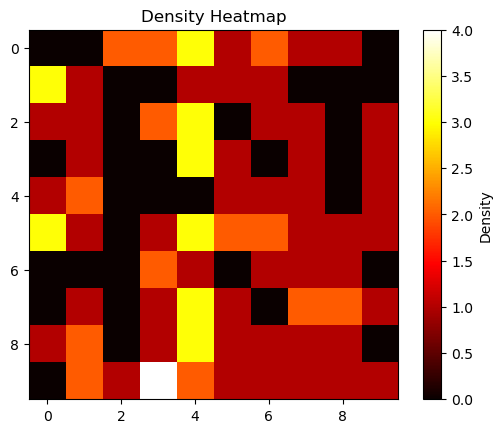

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 生成随机点
points = np.random.rand(100, 2) * 100  # 生成100个随机点，范围在[0, 100)之间

# 2. 构建网格
grid_size = 10
density = np.zeros((grid_size, grid_size))

# 3. 计算密度
for point in points:
    x_idx = int(point[0] // (100 / grid_size))
    y_idx = int(point[1] // (100 / grid_size))
    density[x_idx, y_idx] += 1

# 4. 生成密度图
plt.imshow(density, cmap='hot', interpolation='nearest')
plt.colorbar(label='Density')
plt.title('Density Heatmap')
plt.show()


### 正态分布法（mp）
这里还有一种更好的方法，由于点的分布不可预测，因此整张图的尺寸也同样不可预测，因此可以借用正态分布函数，计算出一张热力图并且离散化，


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 设置地图尺寸和随机点的数量
map_size = 1000
num_points = 100000

# 随机生成点的坐标
points = np.random.rand(num_points, 2) * map_size

# 创建一个格子图，每个格子初始化为0
grid = np.zeros((map_size, map_size))

# 标准差，用于正态分布函数
sigma = 50

# 计算每个格子的值
for x in range(map_size):
    for y in range(map_size):
        distances = np.sqrt((points[:, 0] - x)**2 + (points[:, 1] - y)**2)
        grid[x, y] = np.sum(norm.pdf(distances, scale=sigma))

# 使用热力图显示结果
plt.figure(figsize=(10, 10))
plt.imshow(grid, cmap='hot', origin='lower')
plt.colorbar()
plt.title("Heatmap of 100,000 Points in a 1000x1000 Grid")
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean


# 生成随机节点
def generate_random_nodes(num_nodes, x_max, y_max):
    nodes = np.random.rand(num_nodes, 2)
    nodes[:, 0] *= x_max
    nodes[:, 1] *= y_max
    return nodes


# 计算两点之间的欧几里得距离
def calculate_distance(a, b):
    return euclidean(a, b)


# 使用最近邻算法解决TSP问题
def nearest_neighbor_tsp(nodes):
    path = []
    num_nodes = len(nodes)
    visited = [False] * num_nodes

    # 起点
    current = np.array([100.0, 100.0])
    path.append(current)

    for _ in range(num_nodes):
        min_distance = float('inf')
        nearest_node_index = -1

        for i in range(num_nodes):
            if not visited[i]:
                distance = calculate_distance(current, nodes[i])
                if distance < min_distance:
                    min_distance = distance
                    nearest_node_index = i

        visited[nearest_node_index] = True
        current = nodes[nearest_node_index]
        path.append(current)

    # 终点
    path.append(np.array([0.0, 0.0]))

    return np.array(path)


# 绘制路径
def draw_path(path):
    plt.figure(figsize=(8, 8))
    plt.plot(path[:, 0], path[:, 1], marker='o', linestyle='-', color='b')
    plt.scatter(path[:, 0], path[:, 1], color='r')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Path')
    plt.grid(True)
    plt.show()


def main():
    num_nodes = 1000
    
    x_max = 100.0
    y_max = 100.0

    # 生成随机节点
    nodes = generate_random_nodes(num_nodes, x_max, y_max)

    # 计算最近邻路径
    path = nearest_neighbor_tsp(nodes)

    # 绘制路径
    draw_path(path)


if __name__ == "__main__":
    main()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# 生成随机节点
def generate_random_nodes(num_nodes, x_max, y_max):
    nodes = np.random.rand(num_nodes, 2)
    nodes[:, 0] *= x_max
    nodes[:, 1] *= y_max
    return nodes

# 计算两点之间的欧几里得距离
def calculate_distance_matrix(nodes):
    num_nodes = len(nodes)
    dist_matrix = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            dist_matrix[i, j] = np.linalg.norm(nodes[i] - nodes[j])
    return dist_matrix

# 动态规划解决 TSP
def tsp_dynamic_programming(dist_matrix):
    num_nodes = len(dist_matrix)
    dp = np.full((1 << num_nodes, num_nodes), np.inf)
    dp[1][0] = 0
    
    for mask in range(1 << num_nodes):
        for i in range(num_nodes):
            if not (mask & (1 << i)):
                continue
            for j in range(num_nodes):
                if mask & (1 << j) and i != j:
                    dp[mask][i] = min(dp[mask][i], dp[mask ^ (1 << i)][j] + dist_matrix[j][i])
    
    full_mask = (1 << num_nodes) - 1
    best_path_cost = min(dp[full_mask][i] + dist_matrix[i][0] for i in range(1, num_nodes))
    return best_path_cost, dp

# 反向追踪路径
def get_path(dp, dist_matrix):
    num_nodes = len(dist_matrix)
    mask = (1 << num_nodes) - 1
    last_index = np.argmin([dp[mask][i] + dist_matrix[i][0] for i in range(1, num_nodes)]) + 1
    
    path = [0]
    while mask:
        path.append(last_index)
        mask, last_index = mask ^ (1 << last_index), np.argmin([dp[mask ^ (1 << last_index)][j] + dist_matrix[j][last_index] for j in range(num_nodes) if mask & (1 << j)])
    return path[::-1]

# 绘制路径
def draw_path(nodes, path):
    plt.figure(figsize=(8, 8))
    plt.plot(nodes[path, 0], nodes[path, 1], marker='o', linestyle='-', color='b')
    plt.scatter(nodes[:, 0], nodes[:, 1], color='r')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Path')
    plt.grid(True)
    plt.show()

def main():
    num_nodes = 10
    x_max = 100.0
    y_max = 100.0
    
    # 生成随机节点
    nodes = generate_random_nodes(num_nodes, x_max, y_max)
    
    # 计算距离矩阵
    dist_matrix = calculate_distance_matrix(nodes)
    
    # 计算最短路径和最小路径代价
    best_path_cost, dp = tsp_dynamic_programming(dist_matrix)
    
    # 反向追踪路径
    path = get_path(dp, dist_matrix)
    
    # 打印最短路径和代价
    print(f"The shortest path cost is: {best_path_cost}")
    print(f"The path is: {path}")
    
    # 绘制路径
    draw_path(nodes, path)

if __name__ == "__main__":
    main()
